<a href="https://colab.research.google.com/github/bingsen-wang/Python-Examples/blob/main/PrimaryToQuinaryColors_RGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Primary and Secondary Colors RGB
</h1></b>

Dr. Bingsen Wang

1/6/2024
</center>

#Python Code
The Python code illustrates the principle of additive colors.

0
0
1
2
3
4
5
6
7
8
0


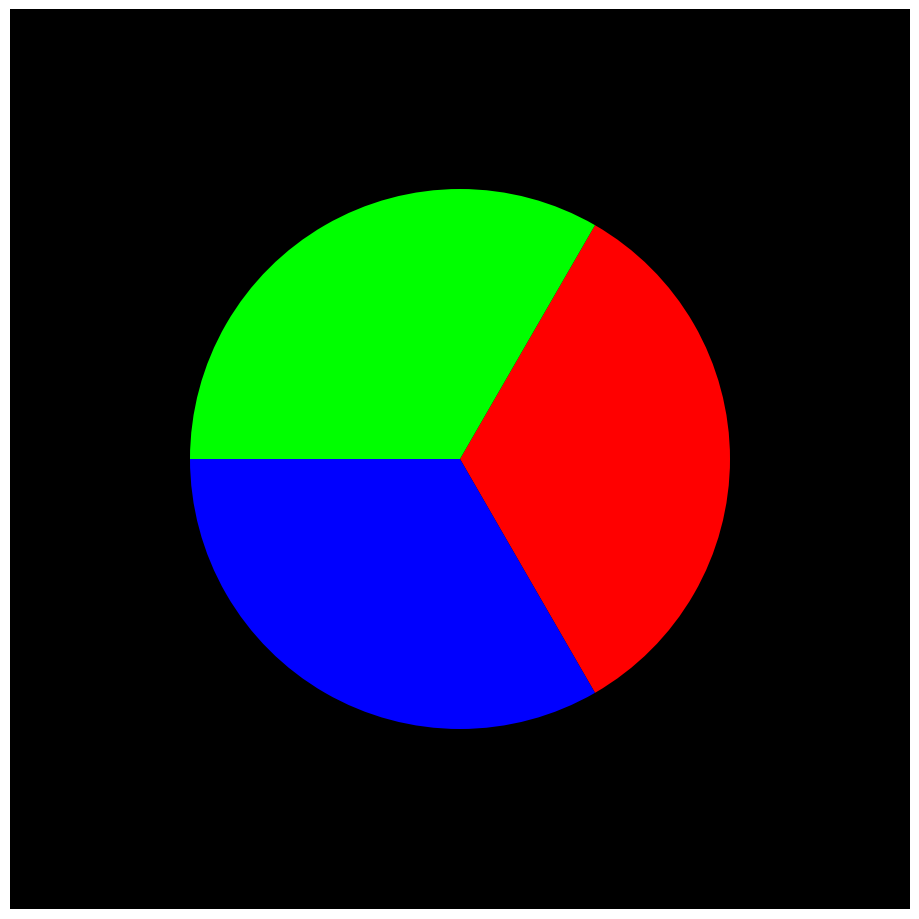

In [ ]:
from os import linesep
import shapely.geometry as sg
import numpy as np
from numpy import linspace,cos,sin,pi,deg2rad
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib import animation,rc,colors
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

def rgb2hex(rgb):
  return "#%02X%02X%02X" % (round(rgb[0]*255),round(rgb[1]*255),round(rgb[2]*255))

#colored patch between arcs of radi ri and ro spanning angle theta
def colorPatches(ax, theta, ro, width, theta_r,colors,txtloc):
  for i in range(len(colors)):
    arcsect = mp.Wedge((0,0),ro,theta1 = -.5*theta+theta_r+i/len(colors)*360,
                       theta2 = .5*theta+theta_r+i/len(colors)*360,
                       width=width,fc=colors[i],ec='none')#inner arc
    ax.add_patch(arcsect)
    if txtloc=='inner':
      ax.text((ro-width)*cos(deg2rad(theta_r+i/len(colors)*360)),
              (ro-width)*sin(deg2rad(theta_r+i/len(colors)*360)),
              rgb2hex(colors[i]),ha='right',va='center',size=14, color=colors[i],
              rotation=theta_r+i/len(colors)*360,rotation_mode='anchor')
              # color='w',rotation=theta_r+i/len(colors)*360,rotation_mode='anchor')
    if txtloc=='outer':
      ax.text(ro*cos(deg2rad(theta_r+i/len(colors)*360)),
              ro*sin(deg2rad(theta_r+i/len(colors)*360)),
              rgb2hex(colors[i]),ha='left',va='center',size=14,color=colors[i],
              rotation=theta_r+i/len(colors)*360,rotation_mode='anchor')
              # color='w',rotation=theta_r+i/len(colors)*360,rotation_mode='anchor')
  return


#parameters
Nf = 100
t=linspace(0,1,Nf)
w = 0.3 #wedge thickness
ro = .9 #

c1 = np.identity(3)#primary
c2,c12 = [],[] #secondary, primary+secondary
for i in range(len(c1)):
  c2.append(c1[i]+c1[(i+1)%len(c1)])
  c12.append(c1[i])
  c12.append(c2[i])
c3,c13 = [],[] #tertiary, primary to tertiary
for i in range(len(c12)):
  c3.append((c12[i]+c12[(i+1)%len(c12)])/max(c12[i]+c12[(i+1)%len(c12)]))
  c13.append(c12[i])
  c13.append(c3[i])
c4,c14 = [],[] #quaternary, primary to quaternary
for i in range(len(c13)):
  c4.append((c13[i]+c13[(i+1)%len(c13)])/max(c13[i]+c13[(i+1)%len(c13)]))
  c14.append(c13[i])
  c14.append(c4[i])
c5,c15 = [],[] #quinary, primary to quinary
for i in range(len(c14)):
  c5.append((c14[i]+c14[(i+1)%len(c14)])/max(c14[i]+c14[(i+1)%len(c14)]))
  c15.append(c14[i])
  c15.append(c5[i])

c12345 = [c1,c12,c13,c14,c15]
c2c3c4c5 = [c2,c3,c4,c5]
#set up figures
fig = plt.figure(figsize=(9,9))
ax_frame = [[0, 0, 1, 1], [-1.5,1.5], [-1.5,1.5]]# [pos-boundary, xlim, ylim]
xn,xm,yn,ym = ax_frame[1]+ax_frame[2]
ax=fig.add_axes(ax_frame[0],xlim=ax_frame[1], ylim=ax_frame[2],fc='k') #no face color
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
[ax.spines[spine].set_visible(False) for spine in ['top','bottom','left','right']]

# animation function. This is called sequentially
def animate(i):
  ii = i%Nf
  k = i//Nf
  if ii==0:
    print(k) #for monitoring
  ax.clear()
  ax.set_xlim(xn,xm)
  ax.set_ylim(yn,ym)
  if k==0: #primary colors
    if ii<Nf-1:
      colorPatches(ax, 120, ro, ro+(w-ro)*t[ii], 0,c1,'none')
    else:
      colorPatches(ax, 120, ro, ro+(w-ro)*t[ii], 0,c1,'inner')
  if k>0 and k<8: #additional colors
    if k%2==1:
      colorPatches(ax, (120-60*t[ii])/2**(.5*k-.5), ro, w, 0,c12345[int(.5*k-.5)],'inner')
      colorPatches(ax, (120-60*t[ii])/2**(.5*k-.5), ro+w, w, 60/2**(.5*k-.5),c2c3c4c5[int(.5*k-.5)],'outer')
    if k%2==0: #colors merged
      colorPatches(ax, 120/2**(.5*k), ro, w, 0,c12345[int(.5*k-1)],'inner')
      colorPatches(ax, 120/2**(.5*k), ro+w*(1-t[ii]), w, 120/2**(.5*k),c2c3c4c5[int(.5*k-1)],'inner')
  if k==8: #last one increase width and merge
    colorPatches(ax, 120/2**(.5*k), ro+w*t[ii], w*(1+t[ii]), 0,c12345[int(.5*k-1)],'outer')
    colorPatches(ax, 120/2**(.5*k), ro+w, w*(1+t[ii]), 120/2**(.5*k),c2c3c4c5[int(.5*k-1)],'outer')
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf*9, interval=20)
# anim #uncomment to generate animation in the output area
anim.save("PrimaryToQuinaryRGB.mp4", fps=40, dpi = 120) #uncomment to save

